# Basic Programming in Python:

Up to now, most of our effort has been spent on using specialized packages like NumPy and Pandas, but at some point, you will need to do something those packages don't make particularly easy. Even when doing simple things, you will need to speak some basic Python. 

Today, we're going to cover the basics of data types in Python and use simple programming structures to repeat an analysis on multiple data sets. Lastly, we will learn about refactoring our code to make it easier to read and more reusable.

To illustrate these features, we'll be examining data from a comparative study of cognitive ability between macaques and lemurs [link](https://www.researchgate.net/publication/257075016_Lemurs_and_macaques_show_similar_numerical_sensitivity). Data are available [here](http://www.duke.edu/~jmp33/dibs/primates.tar.gz). We will (in a code cell below) download these data into a subdirectory ```data/primates``` inside the working directory.

# Part 1: The Python data Model:

## Quick review:

We've already worked with a few types of data in Python:

- Pandas data frames are like spreadsheets
    - they have named rows and columns
    - they can contain data of different types
    - they have lots of high-level methods for aggregating, analyzing, and plotting data
- NumPy arrays are for efficiently storing lots of data of the same type
    - can be more than 2d (remember the MRI image)
    - all data must be of the same type
    - can use advanced indexing/slicing methods to get subset of data
    - fast numerical computations
- lists are for general ordered collections
    - a list of objects of any type
    - can add or delete elements
    - elements are ordered starting from 0
    - use the square bracket (```[ ]```) notation both to make a list and retrieve elements
    

## Other data types:

In addition to these, there are lots of other types of variables in Python. In fact, you can even define your own!

One of the key features of Python, is that lots of different types of variables behave similarly. So learning a few key types of commands will carry us a long way.

### Tuples

For example, let's take a look at **tuples**, which look a lot like lists without the square brackets:

In [1]:
mylist = ['a', 'b', 'c', 'd', 'e']
mytup = 'a', 'b', 'c', 'd', 'e'

print(mylist)
print(mytup)

['a', 'b', 'c', 'd', 'e']
('a', 'b', 'c', 'd', 'e')


You can see that tuples are printed with parentheses, which are not required, but make the syntax easier to read. In fact, we will often define tuples this way:

In [2]:
another_tup = (1, 2, 3)
one_element_tuple = 'a',

print(another_tup)
print(one_element_tuple)

(1, 2, 3)
('a',)


Lists and tuples behave a lot alike:

In [3]:
print(len(mylist))
print(len(mytup))

5
5


In [4]:
print(mylist[1])
print(mytup[1])

mylist[1] == mytup[1]

b
b


True

In [5]:
print(mylist[2:])
print(mytup[2:])

['c', 'd', 'e']
('c', 'd', 'e')


But there is one important way in which tuples and lists differ: **tuples are immutable**. This means that you cannot add to, delete from, or change a tuple. Once created, its contents cannot be altered.

In [6]:
mylist[-1] = 'egg'
print(mylist)

mytup[-1] = 'egg'
print(mytup)

['a', 'b', 'c', 'd', 'egg']


TypeError: 'tuple' object does not support item assignment

Among other things, this means that tuples cannot be sorted or reversed, though using the ```+``` operator still works, since it creates a new tuple:

In [7]:
print(mylist + ['f', 'g', 'h'])
print(mytup + ['f', 'g', 'h'])

['a', 'b', 'c', 'd', 'egg', 'f', 'g', 'h']


TypeError: can only concatenate tuple (not "list") to tuple

Of course, we can't add lists and tuples! Python wouldn't know what we wanted the result to be. But since lists and tuples are so similar, we can convert them to one another using their *constructors*:

In [8]:
print(list(mytup))
print(tuple(mylist))

print(mytup + tuple(['f', 'g', 'h']))

['a', 'b', 'c', 'd', 'e']
('a', 'b', 'c', 'd', 'egg')
('a', 'b', 'c', 'd', 'e', 'f', 'g', 'h')


This will often be handy when we have some type of data that are a *sequence* (an ordered collection that we can iterate over (more on that below)).

### Strings

Believe it or not, strings are also sequences in Python. They are a lot like both lists and tuples:

In [9]:
mystr = 'like a sir'
print(mystr)

like a sir


In [10]:
print(mystr[5:])
print(list(mystr))

a sir
['l', 'i', 'k', 'e', ' ', 'a', ' ', 's', 'i', 'r']


In fact, we can think of a string as just like a list or tuple with some special functions attached that are particularly useful for strings:

In [11]:
print(mystr.upper())
print(mystr.capitalize())
print(mystr.split(' '))  # that is, split the string on the spaces

LIKE A SIR
Like a sir
['like', 'a', 'sir']


But strings, like tuples, are immutable.

In [12]:
mystr[-1] = 'n'

TypeError: 'str' object does not support item assignment

Even so, operations like reversing and sorting are supported (they just return a new string, leaving the old alone):

In [13]:
print(mystr[::-1])
print(sorted(mystr))
print(''.join(sorted(mystr)))

ris a ekil
[' ', ' ', 'a', 'e', 'i', 'i', 'k', 'l', 'r', 's']
  aeiiklrs


*Digression*: If the ```join``` syntax looks funky to you, you're not alone. We might like to write

```python
print(sorted(mystr).join(''))
```

meaning we want to join the elements of the list with no space in between, but remember that we called 

```python
mystr.split(' ')
```

and since ```split``` a thing we do to strings, ```join``` must be a thing we do to strings, not lists. As a result, the pattern for merging a list of strings is to call ```join``` on the string we want *in between* the elements of the list:

In [14]:
print('-'.join(['trick', 'or', 'treaters']))

trick-or-treaters


Go figure.

### Dictionaries

There are times when we might want to store a collection of variables together, but there is no natural ordering for the variables. For instance, a row in a data frame might be converted to a list, but it would be more helpful to have the column name associated with each variable than to get the entries in any particular order. We would much prefer to get the value by the column name than by an index.

This concept of storing not just values (as in a list or tuple), but as key-value *pairs* is realized by the Python dictionary variable type. Dictionaries in Python are the basis for objects, and so they are very efficient. As opposed to lists, **dicts** use curly braces:

In [15]:
mydict = {'a': 5, 'b': 7}
print(mydict)

{'b': 7, 'a': 5}


Unlike lists or tuples, we get elements from a dictionary by providing a *key*, which returns the corresponding *value*:

In [16]:
print(mydict['a'])
print(mydict['b'])

5
7


Like lists, we can add to dictionaries. A dictionary key can be any object that cannot change (technically it must be "hashable"), and its corresponding value can be anything:

In [17]:
# we can add a key, value pair 
mydict[101] = ['a', 0.1, [4, 5, 7]]
mydict[(1, 2)] = 10
print(mydict)
print(len(mydict))

{(1, 2): 10, 'b': 7, 101: ['a', 0.1, [4, 5, 7]], 'a': 5}
4


And because dicts are key, value pairs, we can make dicts from a tuple or list of 2-tuples:

In [18]:
print(dict([('a', 0), ('b', 1), ('last', 'foo')]))

{'last': 'foo', 'b': 1, 'a': 0}


### However:
- **Dicts are not ordered**
- as a result, dicts can't be sliced, and we can't get an element by index
- we can iterate over a dict (see below), but there are no guarantees about which keys come first or last

## Containers and Iteration

Among the most important commonalities that lists, strings, tuples, and dicts all have (and share with data frames and numpy arrays) are *containment* and *iteration*. This is one of the best examples of how very different data types in Python can behave very similarly, lessening our need to learn unique syntax for every type of data. 

### Containment
In Python, we can check whether an element is in a collection with the ```in``` keyword:

In [19]:
print(mytup)
print(mylist)
print(mystr)
print(mydict)

('a', 'b', 'c', 'd', 'e')
['a', 'b', 'c', 'd', 'egg']
like a sir
{(1, 2): 10, 'b': 7, 101: ['a', 0.1, [4, 5, 7]], 'a': 5}


In [20]:
print('b' in mytup)
print('egg' in mylist)
print('sir' in mystr)
print('ik' in mystr)
print(101 in mydict)
print('a' in mydict)

True
True
True
True
True
True


Note that for dicts, containment checks for *keys* not values. That is, we can find out whether an entry is in the dictionary, but not its value.

### Iteration

In many cases, we want to perform some logic for every element in a collection. To do so, we need a way of stepping through that collection, looking at one element at a time. In Python, this is done with the ```for``` keyword:

In [21]:
for elem in mylist:   # note: this line must end in a colon
    print(elem)        # this line must be indented

a
b
c
d
egg


In [22]:
for char in mystr:    # char is the variable name we give to each element as we step through
    print(char + '-letter')

l-letter
i-letter
k-letter
e-letter
 -letter
a-letter
 -letter
s-letter
i-letter
r-letter


In [23]:
for key in mydict:       # note: iterating over a dict gives us keys
    print(mydict[key])    # every indented line gets repeated
    print('--------')
print(len(mydict))        # this line is not indented, so doesn't get repeated

10
--------
7
--------
['a', 0.1, [4, 5, 7]]
--------
5
--------
4


Almost every data structure in Python can be iterated over, and the ability to do this will allow us to repeat a block of code for each element of a collection. This ability to build code that works for a single element of a collection and easily repeat it is part of the essence of programming.

## Using Logic:

It's pretty typical that we might want to decide whether or not to run a block of code based on some logical condition. The most basic conditional in Python is the ```if``` statement:

In [24]:
if len(mylist) > 2:
    print(mylist[2])

c


In [25]:
testvar = mytup

if isinstance(testvar, list):
    print("variable is a list")
elif isinstance(testvar, tuple):
    print("variable is a tuple")
else:
    print("variable is neither list nor tuple")

variable is a tuple


And we can combine conditions with logical operations:

In [26]:
vowels = 'aeiou'
sentence = 'it was the best of times, it was the worst of times'.split(' ')
print(sentence)

for word in sentence:
    firstletter = word[0]
    if firstletter in vowels or (len(word) > 4):
        print(word.upper())

['it', 'was', 'the', 'best', 'of', 'times,', 'it', 'was', 'the', 'worst', 'of', 'times']
IT
OF
TIMES,
IT
WORST
OF
TIMES


# Handling multiple data sets:

In [ ]:
import os
my_dir = os.getcwd() # get current working directory

!mkdir data/primates/ # make directory called "primates" under "data"
target_dir = os.path.join(my_dir, 'data/primates/')
!wget -P "$target_dir" "https://people.duke.edu/~jmp33/dibs/primates.tar.gz" # download csv to folder

# if this doesn't work, manually download `primates.tar.gz` from https://people.duke.edu/~jmp33/dibs/ 
# to your local machine, and upload it to `data/primates` folder

In [ ]:
!tar -xvzf data/primates/primates.tar.gz -C data/primates/ # extract csv files from tar.gz

In [ ]:
!rm data/primates/primates.tar.gz # remove tar.gz

Normally, we could just use the `%ls` magic to get the list of files in a given directory:

In [27]:
%ls data/primates

Black.csv            Macaque.csv          trained_Macaque.csv
Catta.csv            Mongoose.csv


But if we want to eventually moved over to pure Python, we need to use the `os` library, which gives us operating system commands.

In [28]:
import os
pathparts = ('data', 'primates')

# this command will work on both Windows and Mac/Unix
# the * expands the tuple, so it's as if we'd written os.path.join('data', 'primates')
fullpath = os.path.join(*pathparts)

print(fullpath)

data/primates


In [29]:
datfiles = os.listdir(fullpath)
print(datfiles)

['Black.csv', 'Catta.csv', 'Macaque.csv', 'Mongoose.csv', 'trained_Macaque.csv']


Our first order of business is to figure out our analysis from a single dataset:

In [30]:
fname = os.path.join(fullpath, datfiles[0])

import pandas as pd
# df is short for dataframe
# in code with a lot of dataframes, we would choose a more descriptive name
df = pd.read_csv(fname, index_col=0)  # index_col=0 says the first column of the file is row names

df.head()

,Sub,Species,Date,Block (approx 72 trials),Trial,NumA,NumB,Accuracy,RT,Surface Area
0,hopkins,Black,9/3/08,1.0,1,7,8,0,1.317,equal
1,hopkins,Black,9/3/08,1.0,2,4,9,1,0.583,equal
2,hopkins,Black,9/3/08,1.0,3,3,9,1,0.700,equal
3,hopkins,Black,9/3/08,1.0,4,1,8,1,1.717,congruent
4,hopkins,Black,9/3/08,1.0,5,7,9,0,0.800,equal


We can find out some interesting things:

In [31]:
df['Sub'].unique()

array(['hopkins', 'quinn', 'redford', 'tarantino'], dtype=object)

In [32]:
df['Species'].unique(), df['Date'].unique()

(array(['Black'], dtype=object),
 array(['9/3/08', '9/4/08', '9/8/08', '9/9/08', '9/10/08', '9/11/08',
        '9/12/08', '9/16/08', '9/17/08', '9/18/08', '9/19/08', '9/22/08',
        '9/23/08', '9/30/08', '10/1/08', '9/7/10', '9/8/10', '9/9/10',
        '9/10/10', '9/13/10', '9/14/10', '9/15/10', '9/16/10', '9/20/10',
        '9/22/10', '9/23/10', '9/24/10', '9/27/10', '9/28/10', '9/29/10',
        '1/5/10', '1/6/10', '1/7/10', '1/8/10', '1/11/10', '1/12/10',
        '1/13/10', '1/14/10', '1/15/10', '1/19/10', '1/20/10', '1/22/10',
        '1/23/10', '1/25/10', '1/26/10', '10/2/08', '10/3/08', '10/8/08'], dtype=object))

## Groupby: Split-Apply-Combine:

It's pretty typical in a dataset like this that we want to do some analysis for each subset of the data, however that subset is defined. Pandas makes this very easy:

In [33]:
df.groupby('Sub')[['Accuracy', 'RT']].mean()

,Accuracy,RT
Sub,,
hopkins,0.700803,2.023438
quinn,0.749074,1.345008
redford,0.597222,1.260423
tarantino,0.725096,1.687411


In [34]:
df.groupby(['Sub', 'Surface Area'])[['Accuracy', 'RT']].mean()

Accuracy        RT
Sub       Surface Area                    
hopkins   congruent     0.700803  1.988470
          equal         0.700803  2.058406
quinn     congruent     0.757407  1.280183
          equal         0.740741  1.409833
redford   congruent     0.609259  1.235722
          equal         0.585185  1.285124
tarantino congruent     0.727969  1.757307
          equal         0.722222  1.617515

Groupby has much more sophisticated behavior than this (if you want to group by something other than a specific set of columns, you can supply your own criterion), which you can read about [here](http://pandas.pydata.org/pandas-docs/dev/groupby.html).

In addition, we can plot things like reaction time distributions:

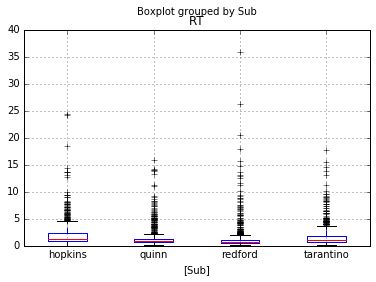

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
df[['Sub', 'RT']].boxplot(by='Sub');

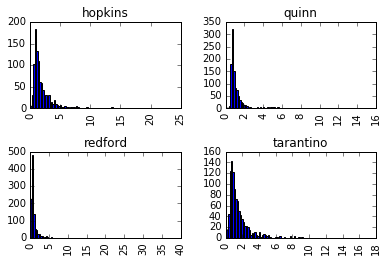

In [36]:
df['RT'].hist(by=df['Sub'], bins=100);

Pandas plotting is sort of lame if we want to plot on the same axis. It's best for quick and dirty plots; if we want to do better, we need to dive more into Matplotlib or Seaborn.

But we can plot all on the same axis if we simply tell Pandas which axis to plot into.

So here's our strategy:
- create an axis object to plot into (`gca` = get current axis)
- split the RT portion of the dataframe into groups using `groubpy`
- iterate over these groups (the iterator gives us a name and a dataframe for each group
- call plot on each dataframe, passing the name as the label and the axis we want to reuse

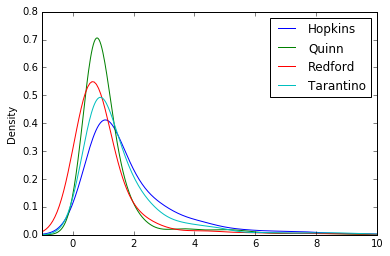

In [37]:
ax = plt.figure().gca()

for name, grp in df.groupby('Sub'):
    grp['RT'].plot(kind='density', ax=ax, label=name.capitalize());

plt.legend();  # draw plot legend

# adjust x limits of plot
plt.xlim(-1, 10);  

So we've seen that we can do some neat things with this individual dataset. In fact, we'd like to do these analyses and *aggregate* across all datasets.

Here's the plan:
    - load each datset in turn
    - get the average RT and Accuracy for each animal, store it in a dataframe
    - plot the RT curve for each animal
    - load the next dataset, repeat

## Multiple datasets: pulling it together:

Let's try to combine the above code into a single chunk of code. We'll iterate over data files and simply repeat the same code each time. (Note how we made a good decision in encoding the file name in a variable we can change instead of hard coding it.)

,Accuracy,RT
Sub,,
hopkins,0.700803,2.023438
quinn,0.749074,1.345008
redford,0.597222,1.260423
tarantino,0.725096,1.687411
agathon,0.725000,3.105548


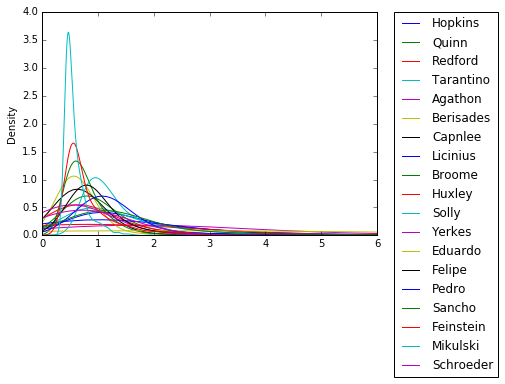

In [38]:
# make an empty piece to hold each dataframe
df_pieces = []

ax = plt.figure().gca()  # make a figure and get its current axis object

# iterate over datfiles
for f in datfiles:
    fname = os.path.join(fullpath, f)
    
    df = pd.read_csv(fname, index_col=0)

    mean_data = df.groupby('Sub')[['Accuracy', 'RT']].mean()
    
    df_pieces.append(mean_data)
    
    for name, grp in df.groupby('Sub'):
        grp['RT'].plot(kind='density', ax=ax, label=name.capitalize());
        
plt.xlim(0, 6)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

combined_data = pd.concat(df_pieces)

combined_data.head()

Note that we basically just copied over the code from before. (For the slick arguments to `legend` that put the box outside and to the right, see example [here](http://matplotlib.org/users/legend_guide.html).

# Building code that lasts

The above chunk of code is pretty nifty. It works, it produces good output, it's something we can back and run in six months to produce that figure.

But how well will you understand that code in six months. What if you need to change it? What if we'd like to reuse the code elsewhere. Typically, researchers use a few approaches:
- generate plots interactively when needed; don't bother with a script
- modify this script as needed to produce new output
- cut and paste from this script when you need to do something similar

The first of these is a terrible idea. The others less so, but they have disadvantages:
- if you modify this script, you need to remember what you modified and where so that you can produce the original figure again
- if you cut and paste, and you later improve the code or find a bug, you need to remember all the places you cut and pasted, correct the code, and re-run
- if you cut and paste, your code will contain lots of repetition; it will be harder to see how what you're doing differs across scripts
    
The strategy that good coders use to surmount these difficulties is *code reuse*. There are lots of ways to reuse code, but the oldest and arguably best is to modularize our code by writing functions. Modular code is built up from smaller subunits. Originally, these units were scripts, but over time, the preferred method is to create functions. Functions are like scripts in that they are named sections of code, but they have a few advantages over scripts, as we will see.

## Modularization: strategy

For scientists, the path to modularization generally takes this form:
- start by exploring data interactively in the console or a notebook
- tidy up the code in a notebook that illustrates a particular analysis
- when you start to see chunks of code that do a single (non-obvious) task, collect those chunks into functions
- rewrite the analysis to call the functions
- remove the functions from the notebook and put them into modules that can be imported

The emphasis here is first on deciding what we want to do (exploring analyses), getting it working (illustrating in a notebook), and only lastly on making our code cleaner and more reusable. The same goes for making our code faster, which comes as a last step. As you become a better programmer, you will develop the ability to think about reuse and speed from the early stages, but even very good coders can be bad guessers at how best to design things early on.

## Making functions

Functions are named blocks of code with inputs and a single output (though we can get around this restriction). To define a function, we can use the `def` keyword:

In [39]:
def myfunc(x):
    print(x + 1)
    return 2 * x

print(myfunc(4))
y = myfunc(-7)
print(y)

5
8
-6
-14


Here, `def` says we are about to define a function. This keyword is followed by the name of the function and a list of its *arguments* in parentheses. Python has several neat features in the way arguments are defined, including the ability to take arguments by name, to leave the number of arguments unspecified, and to give default values to certain arguments. 

Finally, the `return` keyword specifies the output of the function. Note that, like `for`, the line defining the function ends in a colon and the entire function body is indented.

In [40]:
def anotherfunc(x, y=2):  # y has the default value 2
    z = x ** y  # x to the power y
    return z / 2.0

print(anotherfunc(4, 0.5))  # here we specify both x and y
print(anotherfunc(4))  # here we specify only x, so y = 2

1.0
8.0


### Very important:

Functions are like *black boxes*. The information that gets passed into them is bound to the input variable name, but this variable only exists while the function is running. This is a tricky topic that goes under the name of *variable scoping*, but the following examples illustrate that you have to be careful about what information is and isn't being passed into a function.

In [41]:
x = 'foo'
print('x = ' + x)

def reverser(x, appender=''):  # appending an empty string seems like a sensible default
    """
    This is a docstring. It tells us what the function does. 
    This function reverses its input and appends its second argument to the end.
    """
    print('x = ' + x)
    return x[::-1] + appender

print(help(reverser))

print(reverser('bar'))
print(reverser('elephant', ' monkey'))

print('x = ' + x)

x = foo
Help on function reverser in module __main__:

reverser(x, appender='')
    This is a docstring. It tells us what the function does. 
    This function reverses its input and appends its second argument to the end.

None
x = bar
rab
x = elephant
tnahpele monkey
x = foo


Note that the value of `x` inside the function had nothing to do with the value of `x` outside the function. Within the function, `x` took on the value of whatever we passed in as the first argument of reverser. When the function returned, x was restored to its original value.

This may seem confusing, but we actually want this behavior. The fact that variables defined within the function live and die inside the function means that we can use functions without worrying that they will overwrite variables we ourselves define. Imagine if you used a function that had an argument `x` or defined a variable `data`. You may well have these variables running around in your own code, and scoping makes sure that you don't need to worry about someone else's function overwriting them.

Functions take inputs, perform their work, and return outputs. You don't have to know what they are doing under the hood, and your own functions should play nice in the same way.

### What makes a good function?

Some things to consider:
- functions do *one thing*
- functions give us the chance to replace confusing behavior with clearly named behavior
- functions allow us to obey the DRY principle (don't repeat yourself)
- functions can call other functions

So how about we rewrite some parts of the above code?

In [42]:
def get_data_files(pathparts):
    """
    This function takes an iterable of path parts (directories), 
    finds all files in that directory, and returns a list of those files.
    """
    
    import os
    
    # here, we call tuple so that 
    fullpath = os.path.join(*pathparts)

    datfiles = os.listdir(fullpath)
    
    # now add the fullpath to each of these file names so
    # we output a list of absolute paths
    
    output_list = [os.path.join(fullpath, f) for f in datfiles]  # whoa!
    
    return output_list

In [43]:
print(get_data_files(pathparts))  # should work as before

print(get_data_files(list(pathparts)))  # even works if the input is a list

['data/primates/Black.csv', 'data/primates/Catta.csv', 'data/primates/Macaque.csv', 'data/primates/Mongoose.csv', 'data/primates/trained_Macaque.csv']
['data/primates/Black.csv', 'data/primates/Catta.csv', 'data/primates/Macaque.csv', 'data/primates/Mongoose.csv', 'data/primates/trained_Macaque.csv']


Note that Python is smart enough to use a list, since the `*` operator will convert any iterable object (one that can be stepped through) with a tuple and then unpack as normal.

Also, we used a fancy trick inside called a [list comprehension](https://docs.python.org/2/tutorial/datastructures.html#list-comprehensions) that makes it easy to do some operations where we would normally have to iterate (i.e., use a `for` loop).

And we can define a couple of other functions:

In [44]:
def extract_data(df):
    """
    Calculate the mean RT and Accuracy per subject for the dataframe df. 
    Return result as a data frame.
    """
    
    groupvar = 'Sub'
    colvars = ['Accuracy', 'RT']
    
    return df.groupby(groupvar)[colvars].mean()

In [45]:
def plot_RT_dist(df, ax):
    """
    Given a file name and axis object, plot the RT distribution for 
    each animal in the file into the axis object.
    """
    
    groupvar = 'Sub'
    colvar = 'RT'
    
    for name, grp in df.groupby(groupvar):
        grp[colvar].plot(kind='density', ax=ax, label=name.capitalize());
        
    return ax

In [46]:
def do_all_analysis(files):
    """
    This function plots the reaction time density for each subject in each file
    contained in the iterable files. It also calculates the mean accuracy and 
    reaction time for each subject and returns these in a data frame.
    Files should be full file paths.
    """
    import matplotlib.pyplot as plt
    import pandas as pd
    
    df_pieces = []
    ax = plt.figure().gca()
    
    for f in files:
        # read in data
        df = pd.read_csv(f, index_col=0)
        
        # process summary data from df
        summary_data = extract_data(df)
        df_pieces.append(summary_data)
        
        # plot Reaction Time distribution
        plot_RT_dist(df, ax)
        
    # add legend to figure
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
    
    # get figure corresponding to axis
    fig = ax.get_figure()  
    
    # concatenate all extracted dataframe pieces into one
    combined_data = pd.concat(df_pieces)
    
    # now return a tuple with the combined data frame and the figure object
    return combined_data, fig 

,Accuracy,RT
Sub,,
hopkins,0.700803,2.023438
quinn,0.749074,1.345008
redford,0.597222,1.260423
tarantino,0.725096,1.687411
agathon,0.725000,3.105548
berisades,0.727778,0.798131
capnlee,0.664193,0.826445
licinius,0.704630,1.454208
broome,0.751622,0.825900


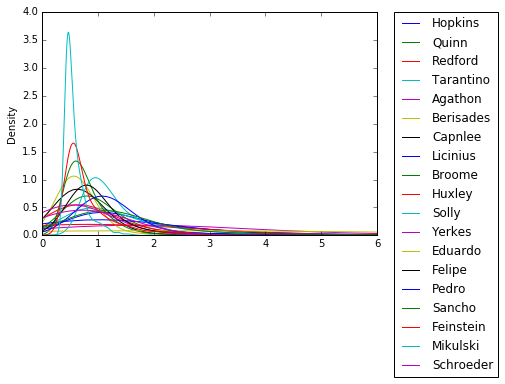

In [47]:
flist = get_data_files(pathparts)

summary_data, fig = do_all_analysis(flist)

plt.xlim(0, 6);

summary_data

# Writing your own modules:

In `lemurs.py`, I've extracted this code into its own standalone module. That is, I've excerpted the functions into their own file. There are at least three ways we can use this separate code file:

1. Because the file has a line

    ~~~python
    if __name__ == '__main__':
    ~~~
    
    the code will check to see if it is being run as a standalone module from the command line. In that case, the special variable `__name__` has the value `'__main__'`, and the code following the colon will execute. In that case, we can simply type
    
    ~~~
    python lemurs.py
    ~~~
    
    at the command line to load the module and run all the code that follows the `if` statement above.

1. Similarly, we can use the `%run` magic function in the IPython notebook:

    ~~~
    %run lemurs
    ~~~
    
    This will have the same effect, except we will be able to carry on at the end of the code with all the variables still intact. This is great if we want to pull part of our analysis into a separate file but try out new ideas in the notebook from the place the code left off.
    
1. Finally, if we just want to make use of some function in the module we can do
    
    ~~~python
    import lemurs
    ~~~
    
    which loads all of the definitions from the module into memory where we can call them. This is *exactly* what we did in importing pandas or numpy, but this time with our own code!

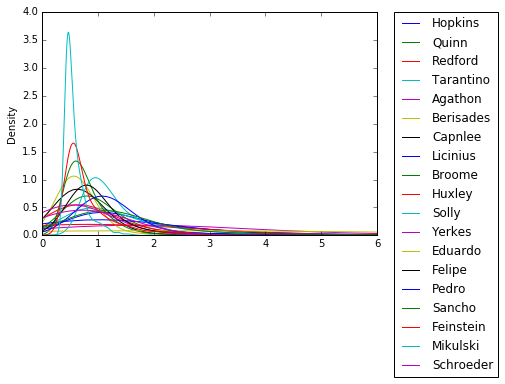

In [48]:
%run lemurs

In [49]:
import lemurs

dir(lemurs)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'do_all_analysis',
 'extract_data',
 'get_data_files',
 'os',
 'pd',
 'plot_RT_dist',
 'plt']

In [50]:
lemurs.get_data_files(pathparts)

['data/primates/Black.csv',
 'data/primates/Catta.csv',
 'data/primates/Macaque.csv',
 'data/primates/Mongoose.csv',
 'data/primates/trained_Macaque.csv']